In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv('c:/data/GlobalWeatherRepository.csv')
data

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19758,Venezuela,Caracas,10.50,-66.92,America/Caracas,1724674500,2024-08-26 08:15,29.2,84.6,Sunny,...,19.6,20.5,2,2,06:18 AM,06:40 PM,No moonrise,12:47 PM,Last Quarter,54
19759,Vietnam,Hanoi,21.03,105.85,Asia/Bangkok,1724674500,2024-08-26 19:15,28.0,82.4,Partly Cloudy,...,271.7,296.0,6,10,05:39 AM,06:17 PM,11:12 PM,12:09 PM,Last Quarter,54
19760,Yemen,Sanaa,15.35,44.21,Asia/Aden,1724674500,2024-08-26 15:15,21.6,70.8,Patchy light rain,...,15.4,51.3,1,2,05:50 AM,06:19 PM,11:41 PM,12:14 PM,Last Quarter,54
19761,Zambia,Lusaka,-15.42,28.28,Africa/Lusaka,1724674500,2024-08-26 14:15,28.2,82.7,Sunny,...,5.6,10.1,1,1,06:16 AM,06:01 PM,No moonrise,11:19 AM,Last Quarter,54


In [16]:
print(data.loc[data['country'].str.contains('Korea')])

           country location_name  latitude  longitude        timezone  \
127    North Korea     Pyongyang     39.02     125.75  Asia/Pyongyang   
162    South Korea         Seoul     37.57     127.00      Asia/Seoul   
322    North Korea     Pyongyang     39.02     125.75  Asia/Pyongyang   
357    South Korea         Seoul     37.57     127.00      Asia/Seoul   
516    North Korea     Pyongyang     39.02     125.75  Asia/Pyongyang   
...            ...           ...       ...        ...             ...   
19340  South Korea         Seoul     37.57     127.00      Asia/Seoul   
19500  North Korea     Pyongyang     39.02     125.75  Asia/Pyongyang   
19535  South Korea         Seoul     37.57     127.00      Asia/Seoul   
19695  North Korea     Pyongyang     39.02     125.75  Asia/Pyongyang   
19730  South Korea         Seoul     37.57     127.00      Asia/Seoul   

       last_updated_epoch        last_updated  temperature_celsius  \
127            1715849100 2024-05-16 17:45:00        

Text(0, 0.5, 'distribution')

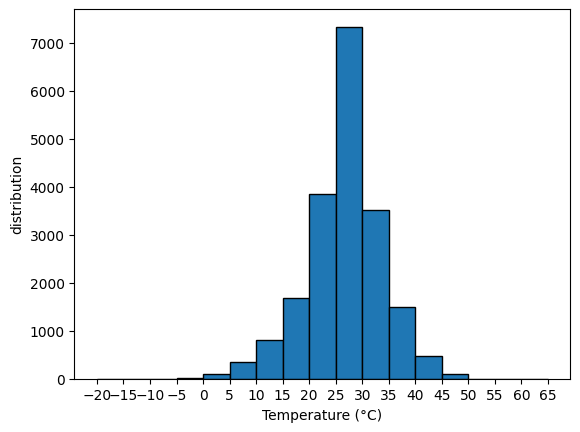

In [2]:
plt.hist(data['temperature_celsius'], bins=range(-20, 70, 5), edgecolor='black')
plt.xticks(range(-20, 70, 5))
plt.xlabel('Temperature (°C)')
plt.ylabel('distribution')

In [3]:
temperature_max = data['temperature_celsius'].max()
temperature_mean = data['temperature_celsius'].mean()
temperature_min = data['temperature_celsius'].min()

data['last_updated'] = pd.to_datetime(data['last_updated'])

last_updated = data['last_updated'].max().strftime('%Y-%m-%d %H:%M:%S')

average_temp_by_country_year = data.groupby([data['last_updated'].dt.year, 'country'])['temperature_celsius'].mean().reset_index()
average_temp_by_country_year.columns = ['year', 'country', 'average_temperature']

print(average_temp_by_country_year)

     year      country  average_temperature
0    2024  Afghanistan            27.863725
1    2024      Albania            32.132353
2    2024      Algeria            29.165347
3    2024      Andorra            20.018627
4    2024       Angola            25.855882
..    ...          ...                  ...
205  2024    Гватемала            15.900000
206  2024       Польша            24.200000
207  2024       Турция            34.000000
208  2024     كولومبيا            23.100000
209  2024           火鸡            29.700000

[210 rows x 3 columns]


In [7]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = temperature_mean,
    title = {'text': "Temperature (°C)"},
    gauge= {'axis': {'range': [None, 50]},
            'bar': {'color': "red"},
            'steps' : [
                {'range': [temperature_min, temperature_max], 'color': "lightblue"}],
            'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': temperature_mean}}))

fig.update_layout(title = 'Average Temperature in the World', font_size = 20)

In [18]:
fig = px.choropleth(
    average_temp_by_country_year,
    locations='country',
    locationmode='country names',
    color='average_temperature',
    color_continuous_scale='Viridis',
    hover_name='country',
    animation_frame='year',
    title='Average Temperature by Country and Year'
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()